In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns

In [19]:
data = []
for _ in range(500):
    team_name = f"Team {chr(random.randint(65,90))}"
    season = random.randint(2010,2023)
    wins = random.randint(50,110)
    losses = 162 - wins
    hits = random.randint(1200,1600)
    doubles = random.randint(200,350)
    triples = random.randint(10,40)
    home_runs = random.randint(100,250)
    strikeouts = random.randint(1000,1500)

    hits_adjusted = hits + (wins-80)*5
    doubles_adjusted = doubles + (wins-80)*2
    triples_adjusted = triples + (wins-80)
    home_runs_adjusted = home_runs + (wins-80)*3
    strikeouts_adjusted = strikeouts - (wins-80)*10
    data.append([team_name,season,wins,losses,hits_adjusted,doubles_adjusted,triples_adjusted,home_runs_adjusted,strikeouts_adjusted])
data

[['Team J', 2011, 63, 99, 1410, 306, -1, 71, 1314],
 ['Team Q', 2010, 64, 98, 1180, 302, -4, 143, 1638],
 ['Team A', 2017, 78, 84, 1483, 342, 32, 222, 1380],
 ['Team K', 2015, 92, 70, 1559, 264, 45, 273, 1118],
 ['Team P', 2010, 50, 112, 1279, 223, -17, 90, 1317],
 ['Team M', 2018, 76, 86, 1560, 283, 26, 197, 1466],
 ['Team Z', 2017, 105, 57, 1463, 299, 38, 253, 1074],
 ['Team V', 2011, 54, 108, 1161, 288, -12, 160, 1697],
 ['Team W', 2014, 96, 66, 1309, 315, 36, 264, 1321],
 ['Team C', 2023, 57, 105, 1186, 190, 14, 65, 1308],
 ['Team O', 2010, 104, 58, 1659, 273, 55, 293, 1043],
 ['Team N', 2022, 80, 82, 1423, 220, 18, 163, 1145],
 ['Team I', 2018, 109, 53, 1373, 367, 44, 188, 828],
 ['Team D', 2020, 106, 56, 1600, 274, 66, 285, 1137],
 ['Team E', 2020, 52, 110, 1354, 150, 12, 52, 1297],
 ['Team T', 2014, 62, 100, 1310, 305, 21, 192, 1664],
 ['Team U', 2014, 56, 106, 1429, 185, 12, 69, 1334],
 ['Team L', 2020, 105, 57, 1536, 310, 60, 186, 1083],
 ['Team Z', 2019, 57, 105, 1307, 240, -

In [20]:
x_features = ['team_name','season','wins','losses','hits','doubles','triples','home_runs','strikeouts']
df = pd.DataFrame(data , columns=x_features)
df.head()

,team_name,season,wins,losses,hits,doubles,triples,home_runs,strikeouts
0,Team J,2011,63,99,1410,306,-1,71,1314
1,Team Q,2010,64,98,1180,302,-4,143,1638
2,Team A,2017,78,84,1483,342,32,222,1380
3,Team K,2015,92,70,1559,264,45,273,1118
4,Team P,2010,50,112,1279,223,-17,90,1317


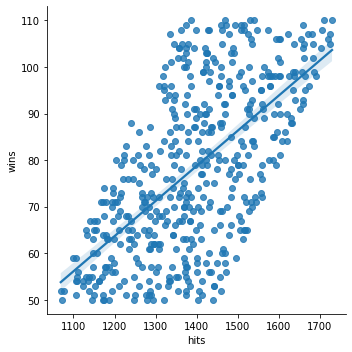

In [21]:
sns.lmplot(x='hits' , y='wins' , data=df)

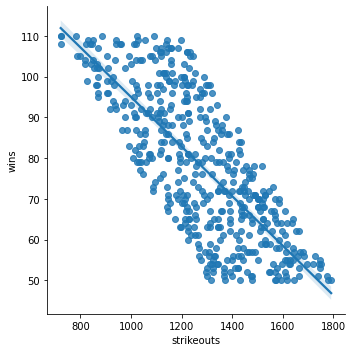

In [22]:
sns.lmplot(x='strikeouts' , y='wins' , data=df)

In [25]:
df2 = df.drop(columns=['team_name','season','losses'] , axis=1)
df2.head()

,wins,hits,doubles,triples,home_runs,strikeouts
0,63,1410,306,-1,71,1314
1,64,1180,302,-4,143,1638
2,78,1483,342,32,222,1380
3,92,1559,264,45,273,1118
4,50,1279,223,-17,90,1317


In [26]:
X = df[['hits','doubles','triples','home_runs','strikeouts']]
y = df['wins']

In [27]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test = train_test_split(X ,y , test_size=0.2 , random_state=24)

In [30]:
from sklearn.linear_model import LinearRegression